Import Libraries and Load Dataset

In [32]:
%pip install seaborn

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset to understand its structure
file_path = 'global_warming_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows to examine the dataset structure
data.head()


,Country,Year,Temperature_Anomaly,CO2_Emissions,Population,Forest_Area,GDP,Renewable_Energy_Usage,Methane_Emissions,Sea_Level_Rise,...,Waste_Management,Per_Capita_Emissions,Industrial_Activity,Air_Pollution_Index,Biodiversity_Index,Ocean_Acidification,Fossil_Fuel_Usage,Energy_Consumption_Per_Capita,Policy_Score,Average_Temperature
0,Country_103,1913,-1.163537,8.876061e+08,1.627978e+08,54.872178,6.139887e+12,76.710013,8.317626e+06,8.111839,...,82.691409,2.285351,4.060975,150.285539,90.073356,8.025470,39.163860,1480.164332,78.870012,20.825292
1,Country_180,1950,-0.432122,4.497517e+08,4.281359e+08,84.051006,2.601447e+12,68.450021,6.206540e+06,42.025915,...,59.322883,17.411668,85.300604,27.305922,88.289837,8.021719,28.252554,1482.730048,32.600905,28.720587
2,Country_93,2014,0.444954,4.579080e+08,4.926732e+08,72.295357,5.192677e+12,36.725699,1.056885e+06,20.953840,...,94.982931,12.039703,83.804880,216.911429,86.936256,7.647408,61.548382,706.918809,37.671300,15.014084
3,Country_15,2020,-1.171616,5.049503e+08,1.252169e+09,17.259684,8.252128e+12,77.547901,1.986813e+06,45.599595,...,62.064250,2.853957,47.014265,35.869182,44.904331,7.569353,82.423750,2616.238324,86.581725,-1.277086
4,Country_107,1964,-0.564038,6.898891e+08,2.932960e+08,44.438605,8.560746e+12,10.019576,3.313252e+06,7.652150,...,84.431279,19.801173,89.379613,284.263093,8.102916,8.015415,29.964450,4975.683780,20.618406,2.861989


Data Cleaning 

In [34]:
# Checking for missing values 
print(data.isnull().sum())

# Fill missing numerical values with the column median 
data.fillna(data.median(numeric_only = True), inplace = True)

# Remove duplicates if any 
data.drop_duplicates(inplace = True)

# Ensure correct data types 
data['Year'] = pd.to_numeric(data['Year'], errors = 'coerce')

# Confirm dataset is clean 
print(data.info())

Country                          0
Year                             0
Temperature_Anomaly              0
CO2_Emissions                    0
Population                       0
Forest_Area                      0
GDP                              0
Renewable_Energy_Usage           0
Methane_Emissions                0
Sea_Level_Rise                   0
Arctic_Ice_Extent                0
Urbanization                     0
Deforestation_Rate               0
Extreme_Weather_Events           0
Average_Rainfall                 0
Solar_Energy_Potential           0
Waste_Management                 0
Per_Capita_Emissions             0
Industrial_Activity              0
Air_Pollution_Index              0
Biodiversity_Index               0
Ocean_Acidification              0
Fossil_Fuel_Usage                0
Energy_Consumption_Per_Capita    0
Policy_Score                     0
Average_Temperature              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999


Exploratory Data Analysis 

                     Deforestation_Rate  Temperature_Anomaly
Deforestation_Rate             1.000000            -0.002633
Temperature_Anomaly           -0.002633             1.000000


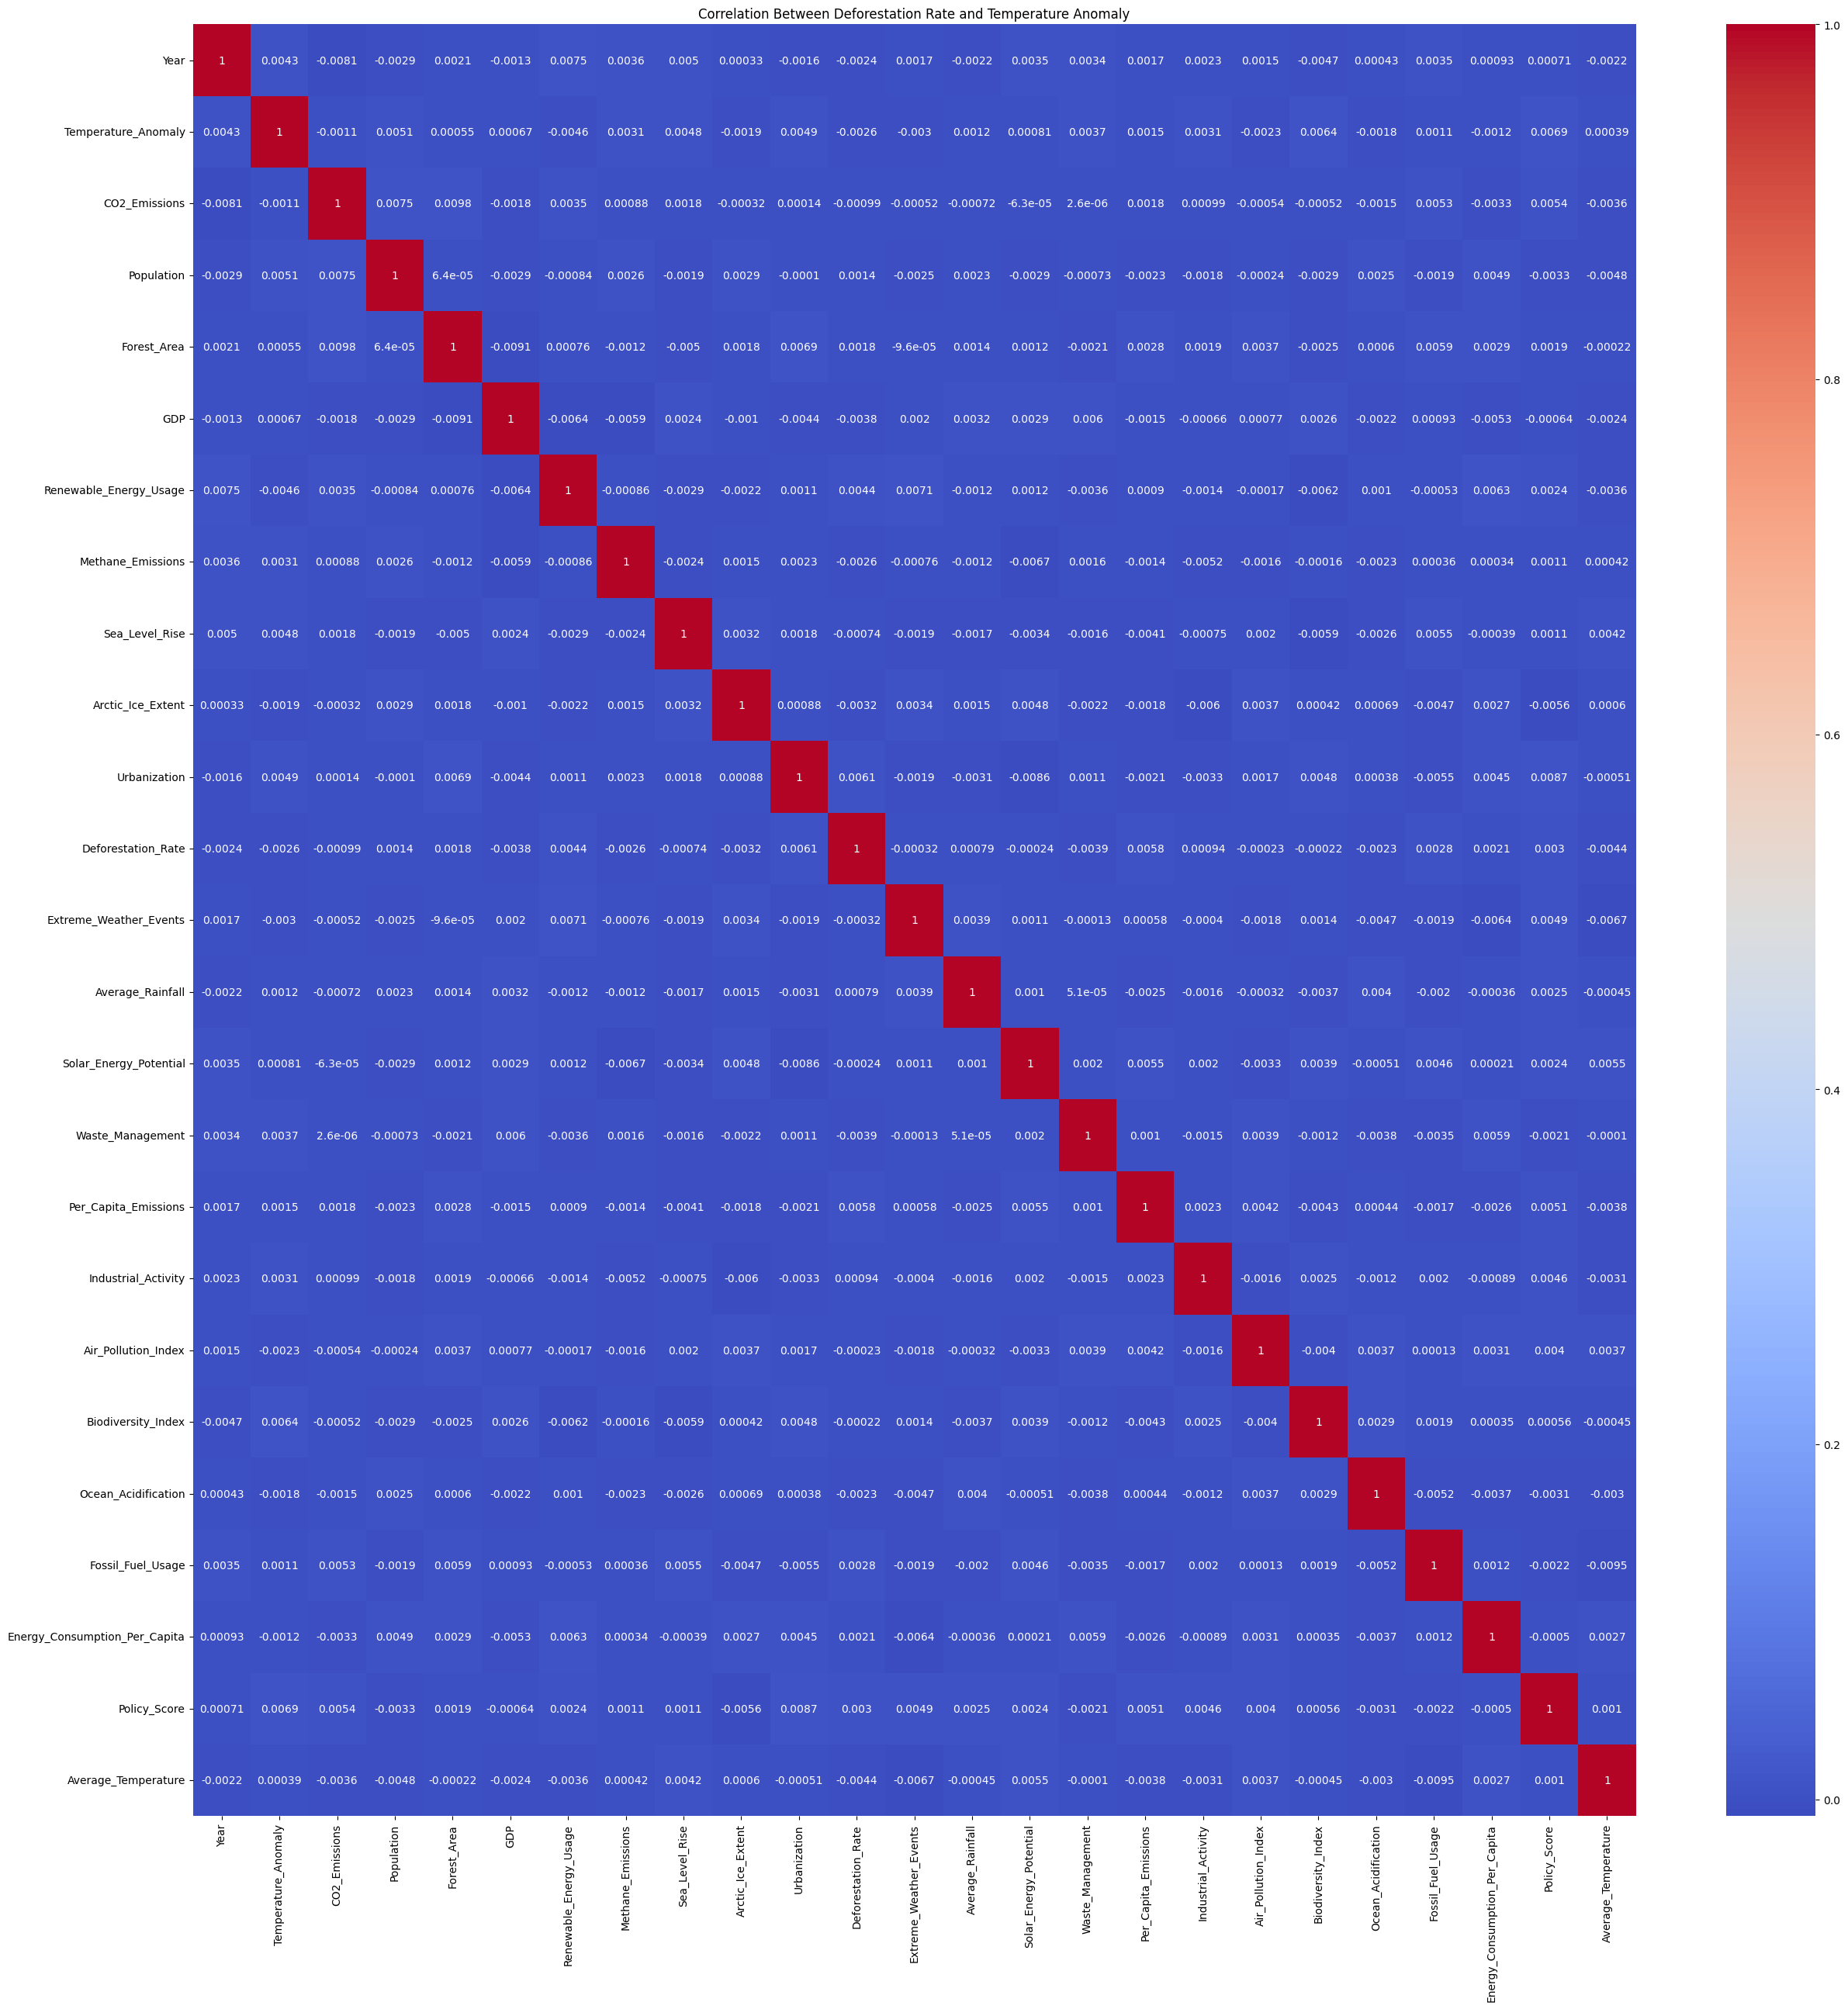

In [35]:
correlation = data[['Deforestation_Rate', 'Temperature_Anomaly']].corr()
print(correlation)

plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Between Deforestation Rate and Temperature Anomaly')
plt.show()

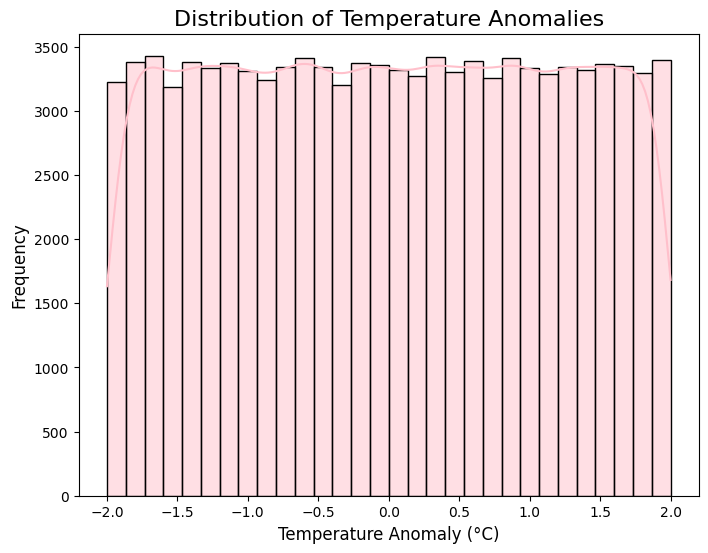

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Temperature_Anomaly'], kde=True, bins=30, color='pink')
plt.title('Distribution of Temperature Anomalies', fontsize=16)
plt.xlabel('Temperature Anomaly (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

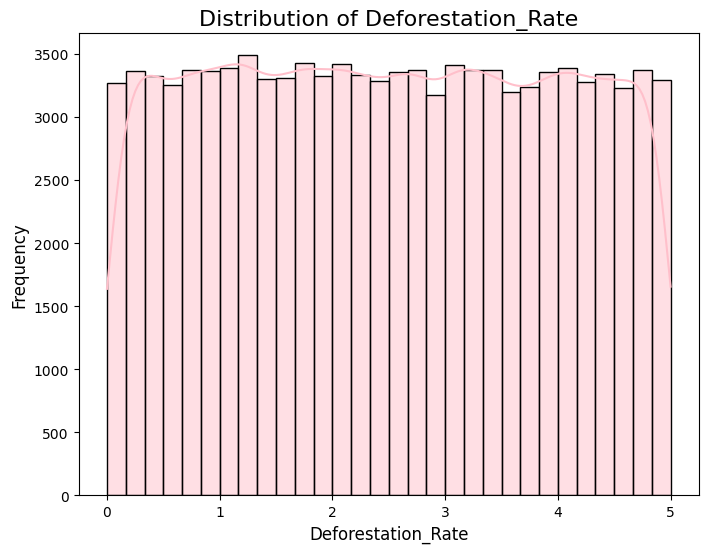

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Deforestation_Rate'], kde=True, bins=30, color='pink')
plt.title('Distribution of Deforestation_Rate', fontsize=16)
plt.xlabel('Deforestation_Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Statistical Analysis

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data for regression
regression_data = data.dropna(subset=['Deforestation_Rate', 'Temperature_Anomaly'])
X = regression_data[['Deforestation_Rate']].values
y = regression_data['Temperature_Anomaly'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print(f"R^2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")


R^2 Score: 4.667536347202628e-06
Mean Squared Error: 1.3362929216278596


Visualizing Regression Results

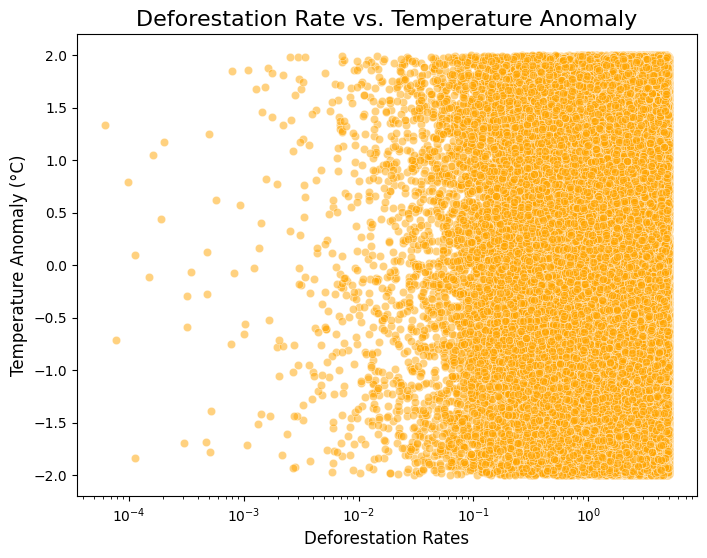

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Deforestation_Rate', y='Temperature_Anomaly', alpha=0.5, color='orange')
plt.title('Deforestation Rate vs. Temperature Anomaly', fontsize=16)
plt.xlabel('Deforestation Rates', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.xscale('log')  # Log scale for better visualization
plt.show()
